In [2]:
from support.df_init import init

df = init()

In [3]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

In [4]:
from support.transformations import apply_transformations

df, _ = apply_transformations(df, )
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK,fill_runtimeMinutes_Bruno,totalNominations,totalMedia,runtimeMinutes_notitletype,outlier_no_type,outlier_w_type
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,1995.0,NaN,0.0,779,1,0,3.091042,...,0,0,0,0,29.0,0.000000,0.693147,89.0,False,False
1,Idealnaya para,6,1992,1992.0,NaN,0.0,38,1,0,3.218876,...,1,0,0,0,94.0,0.000000,0.693147,75.0,False,False
2,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,4.043051,...,0,0,0,0,30.0,0.000000,3.135494,60.0,False,False
3,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,3.871201,...,0,0,0,0,80.0,1.098612,5.857933,80.0,False,True
4,Lightdance,9,1995,1995.0,34.0,0.0,14,1,0,0.000000,...,0,0,0,0,34.0,0.000000,0.693147,34.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16126,Caprices,6,1942,1942.0,NaN,0.0,73,4,0,3.828641,...,1,0,0,0,85.0,0.000000,1.609438,49.0,False,False
16127,Haar Jeet,5,1990,1990.0,NaN,0.0,15,2,0,3.135494,...,0,0,0,0,86.0,0.000000,1.098612,78.0,False,False
16128,Kotigobba 3,6,2021,2021.0,140.0,0.0,2560,39,3,4.867534,...,0,0,0,0,140.0,1.791759,3.761200,140.0,False,True
16129,Ator l'invincibile,4,1982,1982.0,NaN,0.0,3011,52,1,3.988984,...,1,0,0,0,94.0,0.000000,3.988984,47.0,False,False


In [5]:
# cols = [
#     'rating', 'startYear', 'numVotes', 'totalCredits',
#     'criticReviewsTotal',
#     'numRegions', 'userReviewsTotal',
#     # 'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
#     # 'countryOfOrigin_AS', 'countryOfOrigin_EU', 'countryOfOrigin_OC',
#     # 'countryOfOrigin_SA', 'countryOfOrigin_UNK',
#     'fill_runtimeMinutes_Bruno', 'totalNominations', 'totalMedia',
#     # 'runtimeMinutes_notitletype', 
#     # 'outlier_no_type', 'outlier_w_type',
# ]

cols = [
        "startYear", "numVotes", "totalCredits","numRegions", "userReviewsTotal",
        'totalMedia', "criticReviewsTotal",
        'totalNominations', 
        'fill_runtimeMinutes_Bruno',
]

# W/ Outliers

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

data = df[cols].dropna()

# Standardize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Apply Agglomerative Clustering
# ward best
# complete ok
# average sucks
# single sucks
clustering = AgglomerativeClustering(
    n_clusters=None, distance_threshold=0, linkage='ward')
model = clustering.fit(data_scaled)

In [7]:
n_clusters = 4  # Adjust based on your dataset

In [8]:
import numpy as np
from scipy.cluster.hierarchy import fcluster

def compute_linkage_matrix(m):
    counts = np.zeros(m.children_.shape[0])

    n_samples = len(m.labels_)

    for i, (left, right) in enumerate(m.children_):
        count_left = 1 if left < n_samples else counts[left - n_samples]
        count_right = 1 if right < n_samples else counts[right - n_samples]
        counts[i] = count_left + count_right

    lm = np.column_stack(
        [m.children_, m.distances_, counts]
        ).astype(float)


    return lm

n_samples = len(model.labels_)

linkage_matrix = compute_linkage_matrix(model)

merge_distances = np.sort(model.distances_)

distance_at_5th_cluster = merge_distances[
    (len(model.children_) - n_clusters)
]


labels = fcluster(
    linkage_matrix,
    t=distance_at_5th_cluster,
    criterion='distance'
)

In [9]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score

# # Setup
# cluster_range = range(2, 11)  # Reasonable range
# linkages = ['ward', 'complete', 'average', 'single']
# silhouette_scores = {linkage: [] for linkage in linkages}

# # Evaluate silhouette score for each linkage and k
# for linkage in linkages:
#     for k in cluster_range:
#         clustering_k = AgglomerativeClustering(n_clusters=k, linkage=linkage)
#         labels_k = clustering_k.fit_predict(data_scaled)
#         score = silhouette_score(data_scaled, labels_k)
#         silhouette_scores[linkage].append(score)

# # Plot
# plt.figure(figsize=(8, 5))
# for linkage in linkages:
#     plt.plot(cluster_range, silhouette_scores[linkage], marker='o', label=f"{linkage} linkage")

# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs Number of Clusters for Each Linkage Method')
# plt.legend(title="Linkage")
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()


In [10]:
cluster_label_mapping = {i: labels[i] for i in range(n_samples)}

# Step 3: Assign labels to newly formed clusters
for i, (c1, c2, _, _) in enumerate(linkage_matrix):
    new_cluster_idx = i + n_samples  # Index of new cluster
    cluster_label_mapping[new_cluster_idx] = cluster_label_mapping[int(c1)]

In [11]:
custom_colors = [
    '#7f7f7f', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
    'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#00ffff',
    '#800000', '#808000', '#008000', '#800080', '#008080', '#000080',
    '#ff4500', '#daa520', '#b22222', '#4682b4', '#32cd32', '#ff69b4'
]


def _color_func(linkage_matrix, cluster_labels):
    cluster_label_mapping = {i: labels[i] for i in range(n_samples)}
    
    for i, (c1, _, _, _) in enumerate(linkage_matrix):
        new_cluster_idx = i + n_samples
        cluster_label_mapping[new_cluster_idx] = cluster_label_mapping[int(c1)]  # Use first child cluster's label

    mapping = {}
    for i, dist in enumerate(linkage_matrix[:, 2]):
        cluster_id = i + n_samples
        mapping[cluster_id] = (
            'tab:gray' if dist > distance_at_5th_cluster
            else custom_colors[cluster_label_mapping[cluster_id]]
        )
    
    def _map_color(k):
        return mapping.get(k, 'tab:gray')  # Default to grey if not mapped

    return _map_color

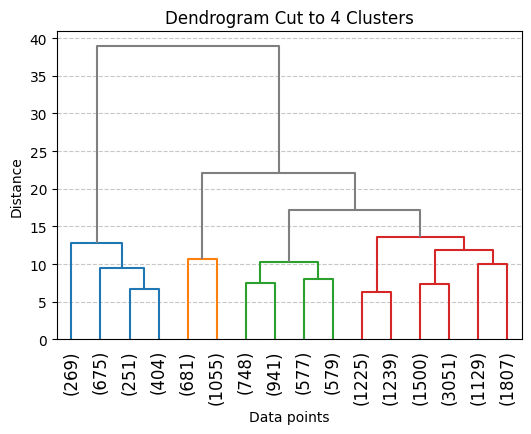

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Step 4: Compute the distance at which the 4th cluster is formed
# When there are 4 clusters left, the previous merge distance gives that threshold
distance_at_4th_cluster = linkage_matrix[-(n_clusters-2), 2]

# 10.08 for ward (4 clusters)
# 1.25 for complete
# single sucks
# average sucks
clusters_at_threshold = fcluster(
    linkage_matrix, t=6, criterion='distance')

# Count how many unique clusters exist at this threshold
num_clusters = len(np.unique(clusters_at_threshold))


# Step 4: Plot dendrogram
plt.figure(figsize=(6, 4))
dendrogram(
    linkage_matrix,
    color_threshold=distance_at_4th_cluster,
    link_color_func=_color_func(linkage_matrix, labels),
    truncate_mode='lastp',
    p=num_clusters,
)
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.title(f"Dendrogram Cut to {n_clusters} Clusters")
# plt.yscale('log')
# plt.grid(axis='both')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

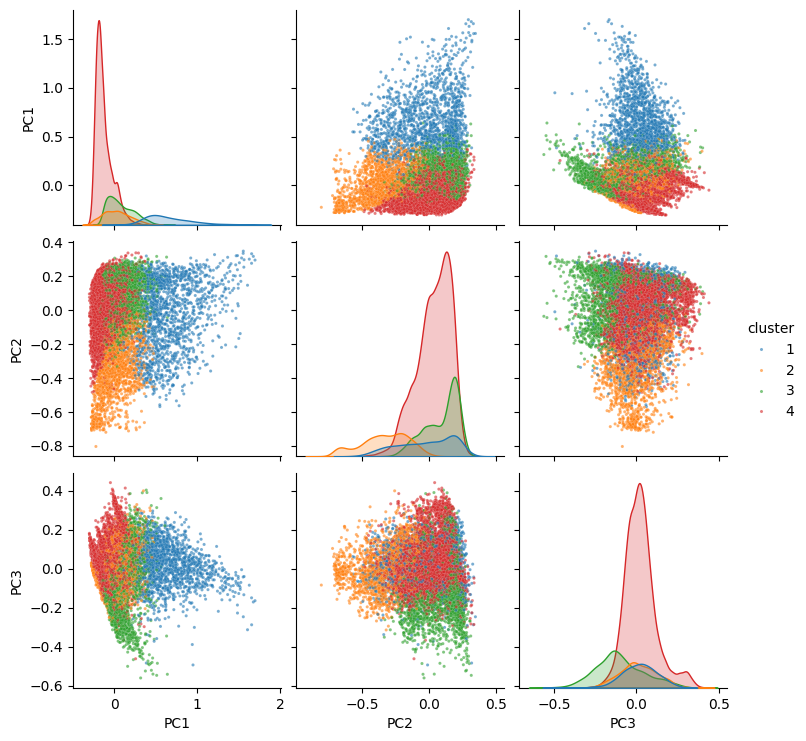

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca_hierarchical(data_pca):
    # Create a DataFrame with principal components
    pca_columns = [f"PC{i+1}" for i in range(len(data_pca[0]))]
    pca_df = pd.DataFrame(data_pca, columns=pca_columns)
    
    pca_df['cluster'] = labels
    
    # Visualize with Seaborn pairplot
    sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", 'PC3'],
        hue="cluster",
        diag_kind="kde",
        palette="tab10",
        plot_kws={"s": 5, "alpha": 0.6, 'linewidth':0.1},
    )
    
    plt.show()


plot_pca_hierarchical(data_pca)

In [15]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score for the current clustering
sil_score = silhouette_score(data_scaled, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2113


# No outliers

In [198]:
n_clusters = 4

In [199]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

data = df.loc[~df['outlier_w_type'], cols].dropna()

# Standardize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Apply Agglomerative Clustering
# ward best
# complete ok
# average sucks
# single sucks
clustering = AgglomerativeClustering(
    n_clusters=None, distance_threshold=0, linkage='ward')
model = clustering.fit(data_scaled)

In [200]:
import numpy as np
from scipy.cluster.hierarchy import fcluster

def compute_linkage_matrix(m):
    counts = np.zeros(m.children_.shape[0])

    n_samples = len(m.labels_)

    for i, (left, right) in enumerate(m.children_):
        count_left = 1 if left < n_samples else counts[left - n_samples]
        count_right = 1 if right < n_samples else counts[right - n_samples]
        counts[i] = count_left + count_right

    lm = np.column_stack(
        [m.children_, m.distances_, counts]
        ).astype(float)


    return lm

n_samples = len(model.labels_)

linkage_matrix = compute_linkage_matrix(model)

merge_distances = np.sort(model.distances_)

distance_at_5th_cluster = merge_distances[
    (len(model.children_) - n_clusters)
]


labels = fcluster(
    linkage_matrix,
    t=distance_at_5th_cluster,
    criterion='distance'
)

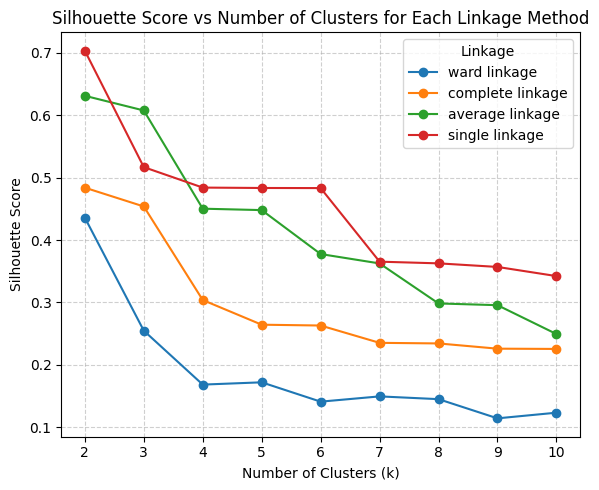

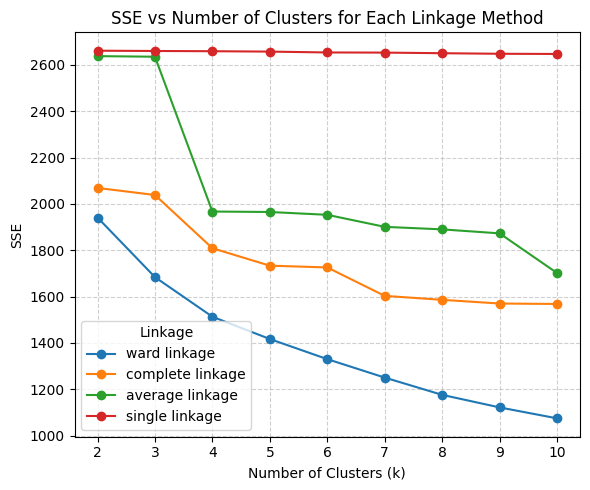

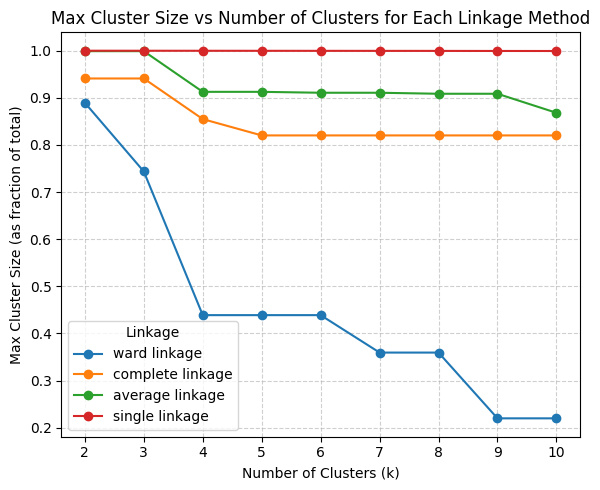

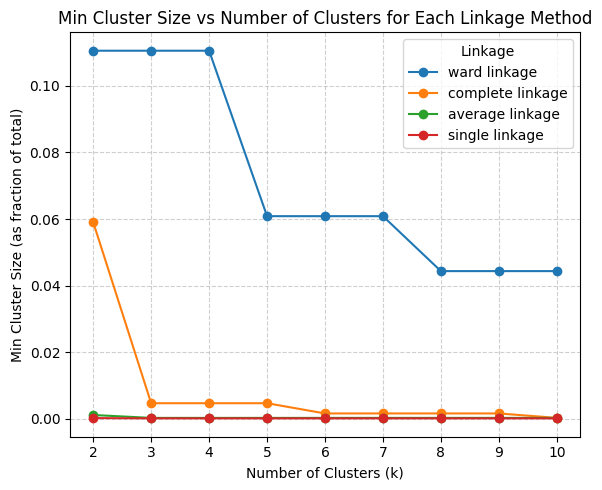

In [112]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Setup
cluster_range = range(2, 11)  # Reasonable range
linkages = ['ward', 'complete', 'average', 'single']
silhouette_scores = {linkage: [] for linkage in linkages}
sse_scores = {linkage: [] for linkage in linkages}
max_cluster_size = {linkage: [] for linkage in linkages}
min_cluster_size = {linkage: [] for linkage in linkages}

# Evaluate silhouette score for each linkage and k
for linkage in linkages:
    for k in cluster_range:
        clustering_k = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels_k = clustering_k.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, labels_k)
        silhouette_scores[linkage].append(score)
        # sse = clustering_k.inertia_  # SSE is not directly available in AgglomerativeClustering
        # sse_scores[linkage].append(sse)
        # Instead, we can compute SSE manually
        sse = 0
        for i in range(k):
            cluster_points = data_scaled[labels_k == i]
            if len(cluster_points) > 0:
                centroid = np.mean(cluster_points, axis=0)
                sse += np.sum((cluster_points - centroid) ** 2)
        sse_scores[linkage].append(sse)
        max_cluster_size[linkage].append(np.max(np.bincount(labels_k)) / len(data_scaled))
        min_cluster_size[linkage].append(np.min(np.bincount(labels_k)) / len(data_scaled))

# Plot
plt.figure(figsize=(6, 5))
for linkage in linkages:
    plt.plot(cluster_range, silhouette_scores[linkage], marker='o', label=f"{linkage} linkage")

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters for Each Linkage Method')
plt.legend(title="Linkage")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
for linkage in linkages:
    plt.plot(cluster_range, sse_scores[linkage], marker='o', label=f"{linkage} linkage")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('SSE vs Number of Clusters for Each Linkage Method')
plt.legend(title="Linkage")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
for linkage in linkages:
    plt.plot(cluster_range, max_cluster_size[linkage], marker='o', label=f"{linkage} linkage")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Max Cluster Size (as fraction of total)')
plt.title('Max Cluster Size vs Number of Clusters for Each Linkage Method')
plt.legend(title="Linkage")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
for linkage in linkages:
    plt.plot(cluster_range, min_cluster_size[linkage], marker='o', label=f"{linkage} linkage")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Min Cluster Size (as fraction of total)')
plt.title('Min Cluster Size vs Number of Clusters for Each Linkage Method')
plt.legend(title="Linkage")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_15515/2769621744.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set2', len(linkages))  # 'tab10' or 'Set2' or 'Dark2'


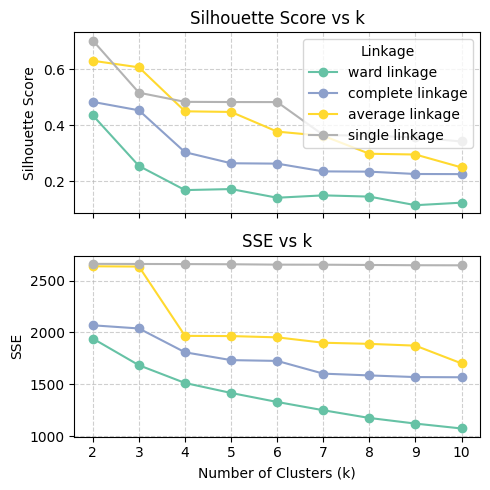

In [211]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Choose a colormap
cmap = cm.get_cmap('Set2', len(linkages))  # 'tab10' or 'Set2' or 'Dark2'

fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True)

# Plot Silhouette Scores
for idx, linkage in enumerate(linkages):
    color = cmap(idx)
    axes[0].plot(cluster_range, silhouette_scores[linkage], marker='o', label=f"{linkage} linkage", color=color)
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score vs k')
axes[0].legend(title="Linkage")
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot SSE Scores
for idx, linkage in enumerate(linkages):
    color = cmap(idx)
    axes[1].plot(cluster_range, sse_scores[linkage], marker='o', label=f"{linkage} linkage", color=color)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('SSE')
axes[1].set_title('SSE vs k')
# axes[1].legend(title="Linkage", loc='upper right')
axes[1].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_15515/2575770790.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set2', len(linkages))  # 'tab10' or 'Set2' or 'Dark2'


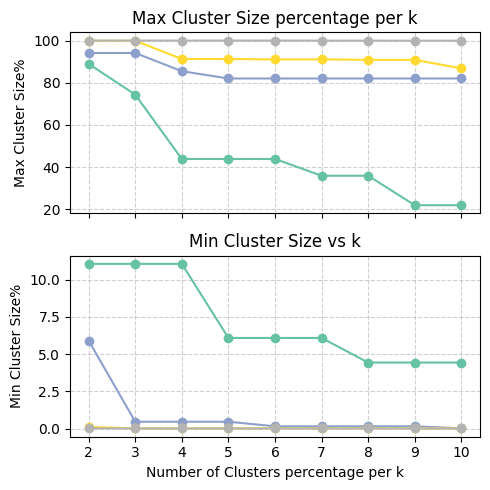

In [210]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Choose a colormap
cmap = cm.get_cmap('Set2', len(linkages))  # 'tab10' or 'Set2' or 'Dark2'

fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True)

# Plot Silhouette Scores
# Plot Max Cluster Size
for idx, linkage in enumerate(linkages):
    color = cmap(idx)
    axes[0].plot(cluster_range, [max_k * 100 for max_k in max_cluster_size[linkage]],
                 marker='o', label=f"{linkage} linkage", color=color)
axes[0].set_ylabel('Max Cluster Size%')
axes[0].set_title('Max Cluster Size percentage per k')
# axes[0].legend(title="Linkage", loc='upper right')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot Min Cluster Size
for idx, linkage in enumerate(linkages):
    color = cmap(idx)
    axes[1].plot(cluster_range, [min_k * 100 for min_k in min_cluster_size[linkage]],
                 marker='o', label=f"{linkage} linkage", color=color)
axes[1].set_xlabel('Number of Clusters percentage per k')
axes[1].set_ylabel('Min Cluster Size%')
axes[1].set_title('Min Cluster Size vs k')
# axes[1].legend(title="Linkage", loc='upper right')
axes[1].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

In [41]:
for key in silhouette_scores:
    max_val = max(silhouette_scores[key])
    max_idx = silhouette_scores[key].index(max_val)
    print(f"{key}: max={max_val:.4f} at k={cluster_range[max_idx]}")
    print(f'{key}: {silhouette_scores[key][4]} at k=4')

ward: max=0.4358 at k=2
ward: 0.14088169635283831 at k=4
complete: max=0.4840 at k=2
complete: 0.26295396343871835 at k=4
average: max=0.6313 at k=2
average: 0.3775498927332825 at k=4
single: max=0.7036 at k=2
single: 0.4833207901598003 at k=4


In [42]:
for key in sse_scores:
    min_val = min(sse_scores[key])
    min_idx = sse_scores[key].index(min_val)
    print(f"{key}: max={min_val:.4f} at k={cluster_range[min_idx]}")
    print(f"{key}: {sse_scores[key][4]:.4f} at k=4")

ward: max=1074.1586 at k=10
ward: 1329.7560 at k=4
complete: max=1567.9997 at k=10
complete: 1725.6799 at k=4
average: max=1701.6336 at k=10
average: 1952.8855 at k=4
single: max=2647.3484 at k=10
single: 2653.8408 at k=4


In [185]:
for key in min_cluster_size:
    max_val = max(min_cluster_size[key])
    max_idx = min_cluster_size[key].index(max_val)
    print(f"{key}: max={max_val:.4f} at k={cluster_range[max_idx]}")
    print(f"{key}: {min_cluster_size[key][4]:.4f} at k=4")

ward: max=0.1106 at k=2
ward: 0.0608 at k=4
complete: max=0.0590 at k=2
complete: 0.0015 at k=4
average: max=0.0011 at k=2
average: 0.0002 at k=4
single: max=0.0001 at k=2
single: 0.0001 at k=4


In [189]:
max_cluster_size['ward'][2]

0.43878301571380807

In [191]:
silhouette_scores['ward'][2], silhouette_scores['ward'][3]

(0.1682248709086065, 0.17188581935721484)

In [192]:
sse_scores['ward'][2], sse_scores['ward'][3]

(1512.9171695771338, 1416.5939648977571)

In [201]:
cluster_label_mapping = {i: labels[i] for i in range(n_samples)}

# Step 3: Assign labels to newly formed clusters
for i, (c1, c2, _, _) in enumerate(linkage_matrix):
    new_cluster_idx = i + n_samples  # Index of new cluster
    cluster_label_mapping[new_cluster_idx] = cluster_label_mapping[int(c1)]

In [202]:
import numpy as np
from scipy.cluster.hierarchy import fcluster

def compute_linkage_matrix(m):
    counts = np.zeros(m.children_.shape[0])

    n_samples = len(m.labels_)

    for i, (left, right) in enumerate(m.children_):
        count_left = 1 if left < n_samples else counts[left - n_samples]
        count_right = 1 if right < n_samples else counts[right - n_samples]
        counts[i] = count_left + count_right

    lm = np.column_stack(
        [m.children_, m.distances_, counts]
        ).astype(float)


    return lm

n_samples = len(model.labels_)

linkage_matrix = compute_linkage_matrix(model)

merge_distances = np.sort(model.distances_)

distance_at_5th_cluster = merge_distances[
    (len(model.children_) - n_clusters)
]


labels = fcluster(
    linkage_matrix,
    t=distance_at_5th_cluster,
    criterion='distance'
)

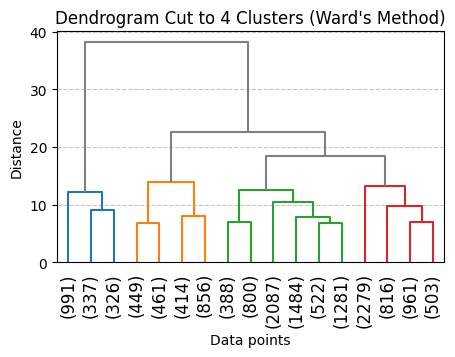

In [203]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Step 4: Compute the distance at which the 4th cluster is formed
# When there are 4 clusters left, the previous merge distance gives that threshold
distance_at_4th_cluster = linkage_matrix[-(n_clusters-2), 2]

# 12 ward (6.8871 for 5 clusters)
# complete 1.26
# single sucks
clusters_at_threshold = fcluster(
    linkage_matrix, t=6.8871, criterion='distance')

# Count how many unique clusters exist at this threshold
num_clusters = len(np.unique(clusters_at_threshold))


# Step 4: Plot dendrogram
plt.figure(figsize=(5, 3))
dendrogram(
    linkage_matrix,
    color_threshold=distance_at_4th_cluster,
    link_color_func=_color_func(linkage_matrix, labels),
    truncate_mode='lastp',
    p=num_clusters,
)
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.title(f"Dendrogram Cut to {n_clusters} Clusters (Ward's Method)")
# plt.yscale('log')
# plt.grid(axis='both')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [204]:
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

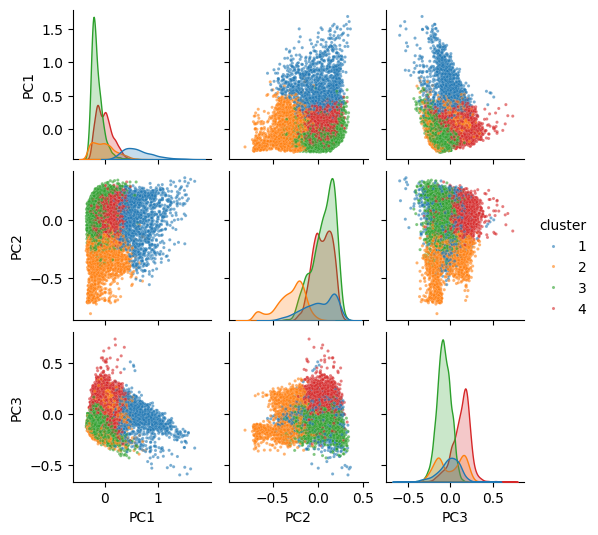

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca_hierarchical(data_pca):
    # Create a DataFrame with principal components
    pca_columns = [f"PC{i+1}" for i in range(len(data_pca[0]))]
    pca_df = pd.DataFrame(data_pca, columns=pca_columns)
    
    pca_df['cluster'] = labels
    
    # Visualize with Seaborn pairplot
    sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", 'PC3'],
        hue="cluster",
        diag_kind="kde",
        palette="tab10",
        plot_kws={"s": 5, "alpha": 0.6, 'linewidth':0.1},
        height=1.8,
        aspect=1
    )
    # plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.show()


plot_pca_hierarchical(data_pca)

In [206]:
# Compute SSE (Sum of Squared Errors) for each cluster
sse_per_cluster = {}
for cluster_label in np.unique(labels):
    cluster_points = data_scaled[labels == cluster_label]
    centroid = np.mean(cluster_points, axis=0)
    sse = np.sum((cluster_points - centroid) ** 2)
    sse_per_cluster[cluster_label] = sse

for cluster_label, sse in sse_per_cluster.items():
    print(f"Cluster {cluster_label}: SSE = {sse:.2f}")

Cluster 1: SSE = 340.29
Cluster 2: SSE = 282.12
Cluster 3: SSE = 464.36
Cluster 4: SSE = 426.15


In [207]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score for the current clustering
sil_score = silhouette_score(data_scaled, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1682


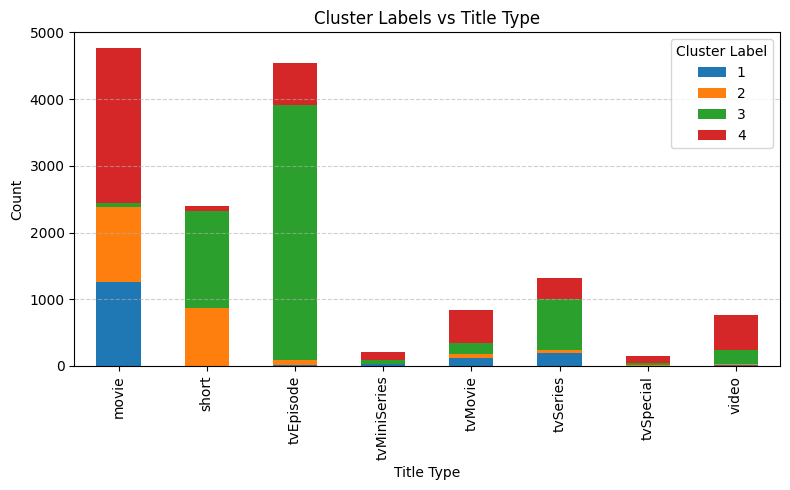

In [208]:
import matplotlib.pyplot as plt

# Cross-tabulate cluster labels and titleType
ct = pd.crosstab(df.loc[data.index, 'titleType'], labels)

# Plot as stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xlabel('Title Type')
plt.ylabel('Count')
plt.title('Cluster Labels vs Title Type')
plt.legend(title='Cluster Label')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

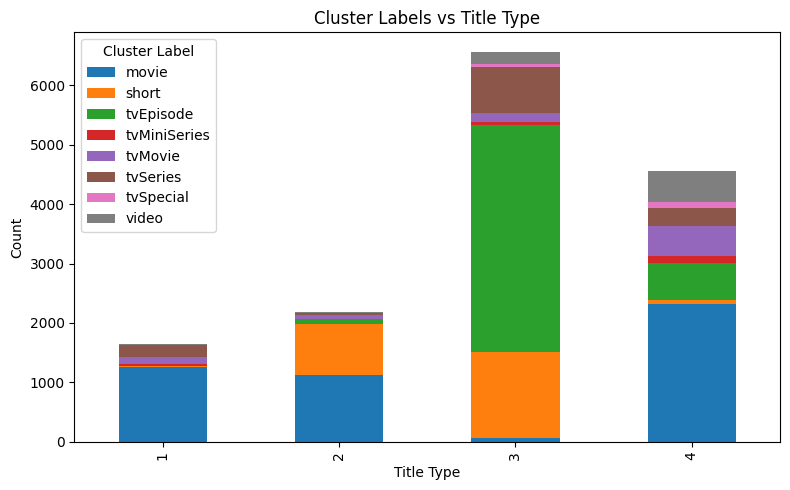

In [209]:
# Cross-tabulate cluster labels and titleType
ct = pd.crosstab(labels, df.loc[data.index, 'titleType'])

# Plot as stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xlabel('Title Type')
plt.ylabel('Count')
plt.title('Cluster Labels vs Title Type')
plt.legend(title='Cluster Label')
plt.tight_layout()
plt.show()

In [194]:
pca.explained_variance_ratio_

array([0.44264851, 0.19148252, 0.10970907])